# Data Visualisering

Data_visual.ipynb er en interaktiv og visuell presentasjon av analysene fra data_analysis.ipynb. Hensikten er å formidle innsiktene på en informativ og engasjerende måte, rettet mot et bredere publikum.

Vi starter med fokus på nedbør, med en visualisering som viser fordelingen av ulike nedbørstyper (i prosent) for hvert år i perioden 2014–2024. Deretter følger en oversikt over tørkeperiodene i samme periode.

Deretter visualiseres vinddata gjennom percentiler, samt en årlig oversikt over høyeste, laveste og gjennomsnittlig vindhastighet.
Siste delen blir en heatmap som viser trender i temperatur og et histogram over årlig forekomster av "ekstremvær".

In [4]:
#Importerer funksjoner og klasser fra data_analysis.py og data_visual.py
import sys
import os
import pandas as pd
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../src')))

original_file = "blindern_data_cleaning.csv"
data_path = os.path.join(os.getcwd(),"..", "data")
original_path = os.path.join(data_path, original_file)  
df = pd.read_csv(original_path, delimiter=";")
df["Tid"] = pd.to_datetime(df["Tid"])

from modelling.data_analysis import DataAnalysis
import modelling.data_visual

from modelling.data_visual import DataVisual


import json

bins_path = os.path.join(os.getcwd(), "..", "data", "bins.json")
with open(bins_path, "r", encoding="utf-8") as f:
    bin_defs = json.load(f)

visualizer = DataVisual(df,bin_defs)




### Fordeling av nedbørstype (årlig)
Kakediagrammet viser fordelingen av nedbørstyper som forekomst i et år for alle år fra 2014 til 2024. Det er mulig å velge hvilket år man vil se på ved å velge på menyen på venstre hjørnet. Det er derfor også mulig å se på forskjeller i fordelingen fra år til år, samt økning/minskning av et eller flere nedbørstyper. 

In [ ]:

visualizer.plot_rainfall()

interactive(children=(Dropdown(description='År:', options=(np.int32(2014), np.int32(2015), np.int32(2016), np.…

### Tørkeperioder
Grafen gir oversikt over alle tørkeperiode (dager uten nedbør) som varte over 12 kontinuerlig dager. 

In [6]:

visualizer.plot_dry_periods(grense=12)

# Vind
### Vind gjennom percentiler
Denne koden visualiserer fordelingen av middelvind i form av en percentilkurve. Ved å sortere vindhastighetene og plassere dem langs en skala fra 0 til 100 prosent, får vi et tydelig bilde av hvordan vindverdiene fordeler seg. Grafen gjør det enkelt å identifisere hvor store deler av datagrunnlaget som ligger under bestemte vindnivåer – for eksempel kan man se hvilken vindstyrke som representerer 90. percentil.

In [7]:
visualizer.plot_wind_percentiles()

### Linechart 
Denne grafen viser maksimal, minimal og gjennomsnittlig vindstyrke per år i perioden. Den gir et raskt overblikk over variasjonen i vindforhold fra år til år, og kan brukes til å identifisere år med spesielt kraftig eller svak vind.

In [8]:
visualizer.plot_yearly_wind_stats()

### Heatmap
 Visualiseringen viser gjennomsnittlig maksimumstemperatur for hver måned og hvert år. Den gir et visuelt overblikk over temperaturtrender og sesongvariasjoner gjennom perioden 2014–2024. Varme farger indikerer høyere temperaturer, mens kjøligere farger viser lavere verdier – nyttig for å identifisere varme somre eller milde vintre.

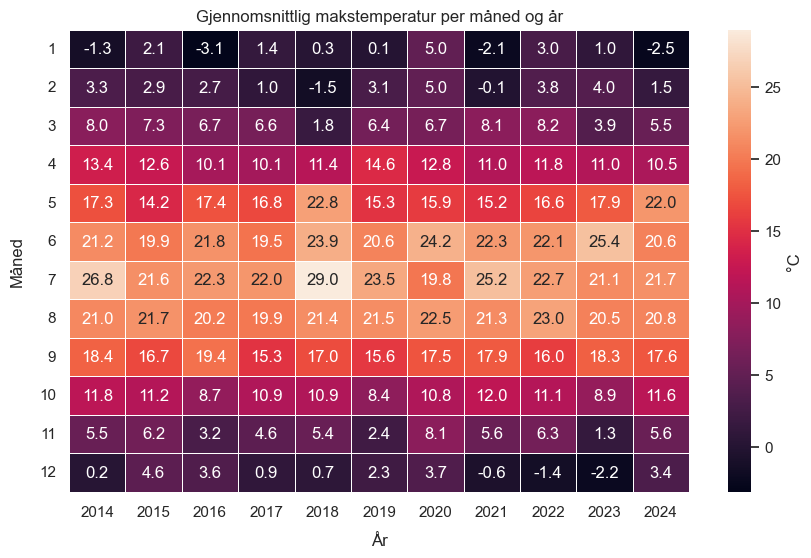

In [9]:
visualizer.plot_temperature_heatmap()

### Ekstremvær
Denne grafen viser årlige forekomster av ekstremvær, fordelt på ulike værtyper som høy temperatur, lave temperaturer, nedbør, snø og sterke vindkast. Dette kan være nyttig for å identifisere klimatisk utvikling eller perioder med unormalt vær.

In [10]:
import plotly.express as px
# Use the class dataAnalysis to calculate the severity cases
da = DataAnalysis(df, 'Makstemp', ['Snø', 'Nedbør'], {"Middelvind": 20.8,"Nedbør": 20.0}, bin_defs)
extreme_weather = da.years_severity().reset_index().rename(columns={'index': 'Tid'})


visualizer.plot_extreme_weather_cases(extreme_weather)